In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from math import sqrt
from PIL import Image
from math import exp
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MORPHOLOGICAL PROCESSING:
1. Erosion
2. Dilation
3. Opening
4. Closing
5. Tophat 
6. BlackHat
7. Gradient

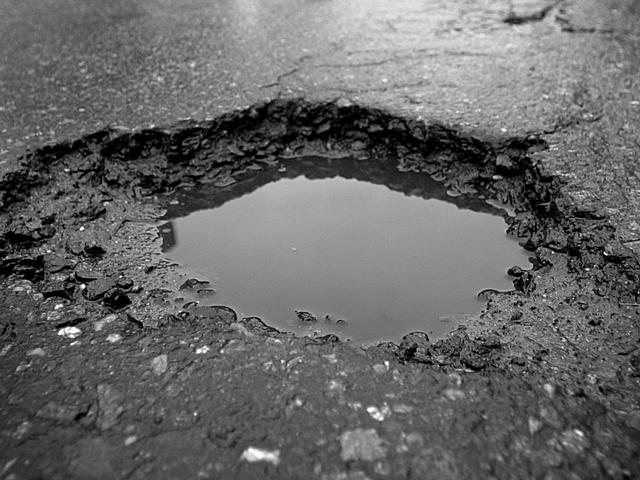

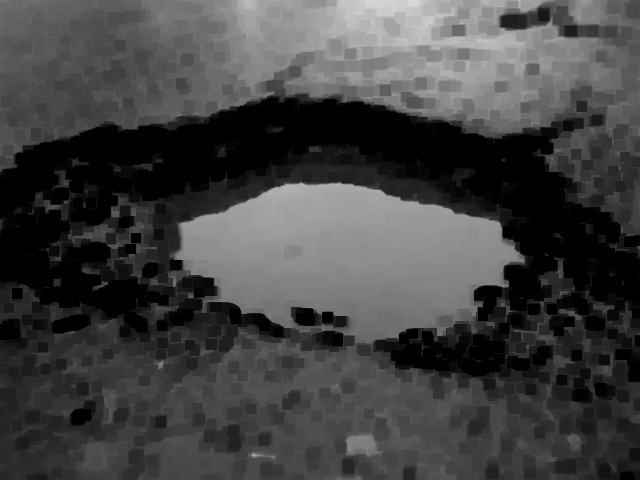

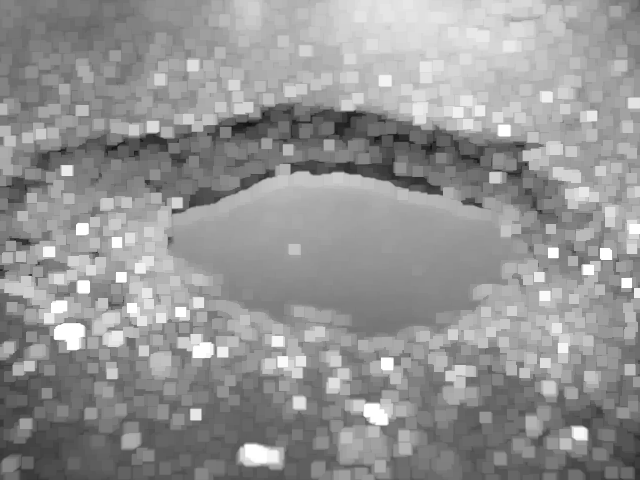

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Reading the input image
img = cv2.imread('/content/6.jpg', 0)

# Taking a matrix of size 5 as the kernel
kernel = np.ones((10,10), np.uint8) # structuring element

# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)

cv2_imshow(img)
cv2_imshow(img_erosion)
cv2_imshow(img_dilation)

cv2.waitKey(0)


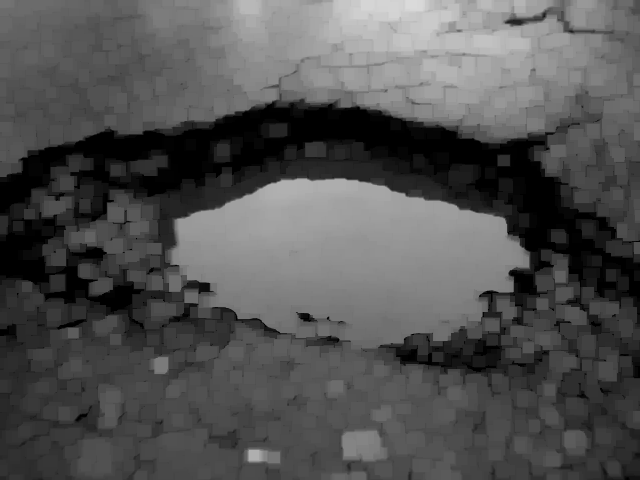

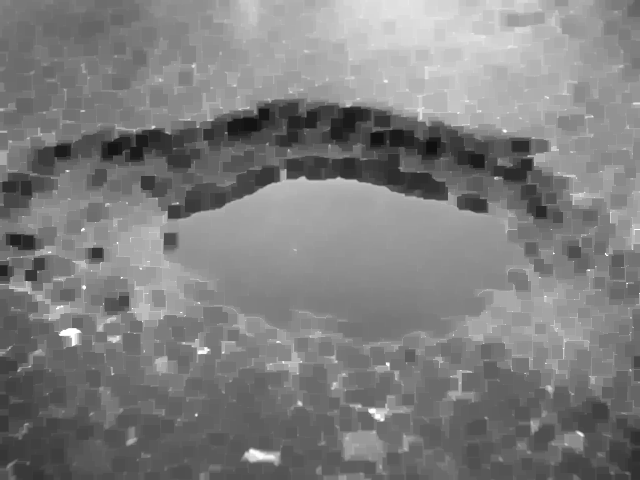

In [ ]:
# Define the structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))

# Apply the opening operation
#erosion->dilation
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
# Apply the closing operation
#dilation->erosion
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2_imshow(opening)
cv2_imshow(closing)

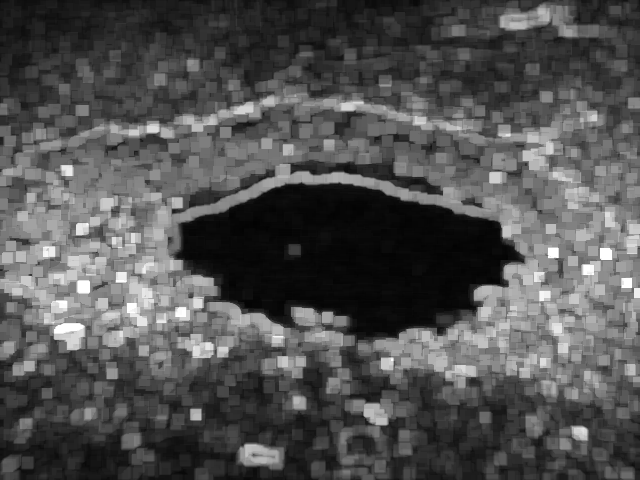

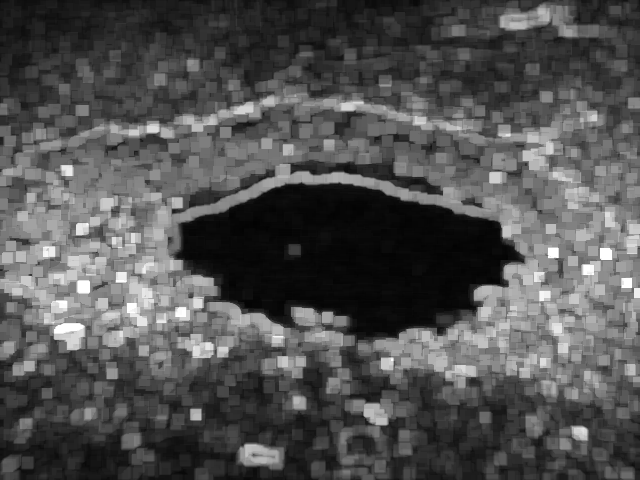

In [ ]:
# Approach-1: Perform erosion and dilation separately and then subtract
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations=1)
gradient1 = dilation - erosion

# Approach-2: Use cv2.morphologyEx()
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(gradient1)
cv2_imshow(gradient)

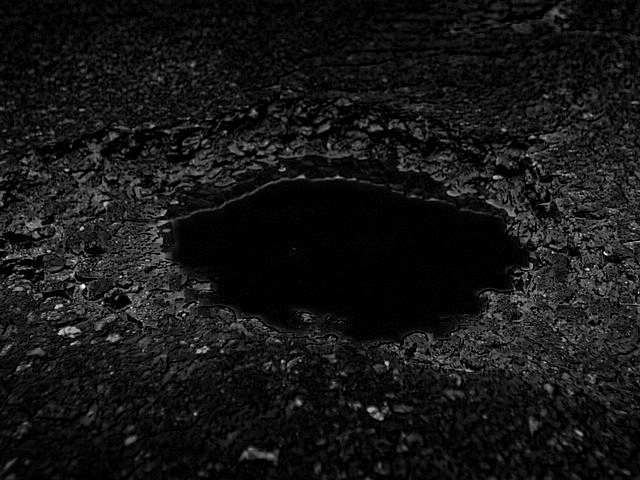

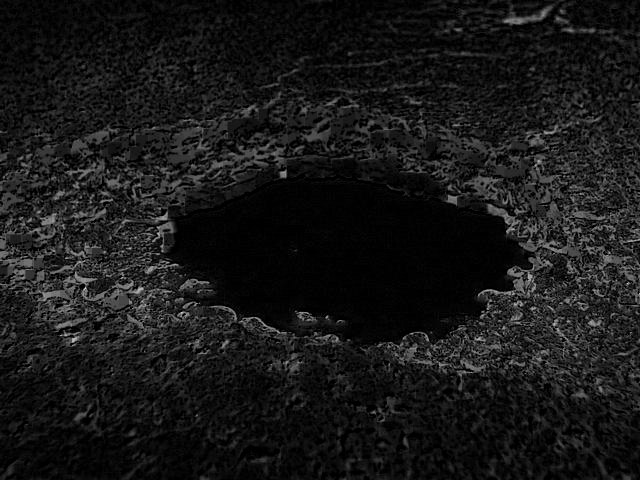

In [ ]:
# Structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))
# Apply the top hat transform
#img-opening
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
# Apply the black hat transform
#img-closing
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
cv2_imshow(tophat)
cv2_imshow(blackhat)

In [ ]:
from math import log10, sqrt

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr
img = cv2.imread('6.jpg',0)
print(f"PSNR value of Erosion {PSNR(img,img_erosion)} dB")
print(f"PSNR value of Dilation {PSNR(img,img_dilation)} dB")
print(f"PSNR value of Opening {PSNR(img,opening)} dB")
print(f"PSNR value of Closing {PSNR(img,closing)} dB")
print(f"PSNR value of Gradient {PSNR(img,gradient)} dB")
print(f"PSNR value of Tophat {PSNR(img,tophat)} dB")
print(f"PSNR value of Blackhat {PSNR(img,blackhat)} dB")

PSNR value of Erosion 28.293689213025125 dB
PSNR value of Dilation 28.106105472064232 dB
PSNR value of Opening 29.015825000721094 dB
PSNR value of Closing 28.767846541852272 dB
PSNR value of Gradient 27.960425493464214 dB
PSNR value of Tophat 28.091637372259722 dB
PSNR value of Blackhat 27.84791930811968 dB


In [ ]:
import math
import numpy as np
import cv2

def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()


def calculate_ssim(img1, img2):
    '''calculate SSIM
    the same outputs as MATLAB's
    img1, img2: [0, 255]
    '''
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')
print(f"SSIM value of Erosion {calculate_ssim(img,img_erosion)} dB")
print(f"SSIM value of Dilation {calculate_ssim(img,img_dilation)} dB")
print(f"SSIM value of Opening {calculate_ssim(img,opening)} dB")
print(f"SSIM value of Closing {calculate_ssim(img,closing)} dB")
print(f"SSIM value of Gradient {calculate_ssim(img,gradient)} dB")
print(f"SSIM value of Tophat {calculate_ssim(img,tophat)} dB")
print(f"SSIM value of Blackhat {calculate_ssim(img,blackhat)} dB")

SSIM value of Erosion 0.32193777617042096 dB
SSIM value of Dilation 0.3299685354946545 dB
SSIM value of Opening 0.4403284243705252 dB
SSIM value of Closing 0.4637408415426465 dB
SSIM value of Gradient 0.14393488981137312 dB
SSIM value of Tophat 0.4054947398597473 dB
SSIM value of Blackhat -0.24838023770388662 dB


The best morphlogical processing is Closing.

EDGE DETECTORS
1. LAPLACIAN
2. CANNY
3. SOBEL
4. PERWITT
5. ROBERT
6. Laplacian of gaussian(Mar-Hildreth)

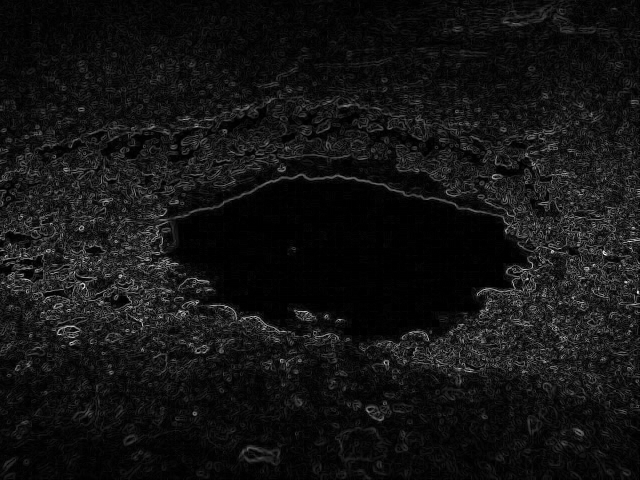

In [ ]:
#ROBERT EDGE DETECTION
from scipy import ndimage
img = cv2.imread("6.jpg",0).astype('float64')
img/=255.0
roberts_cross_v = np.array( [[1, 0 ],
							[0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
							[ -1, 0 ]] )

vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )

edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2_imshow(edged_img)


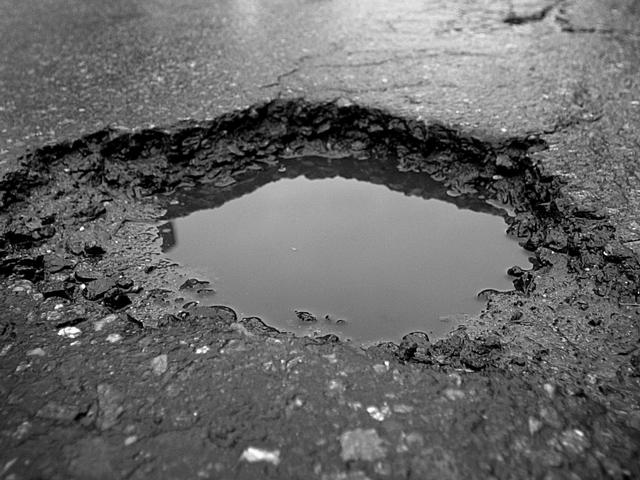

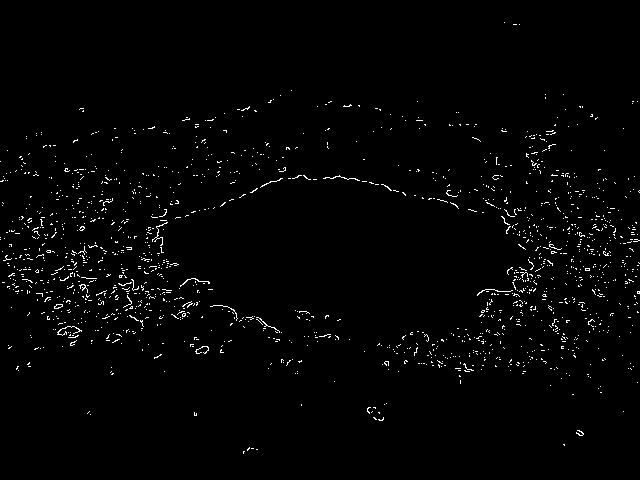

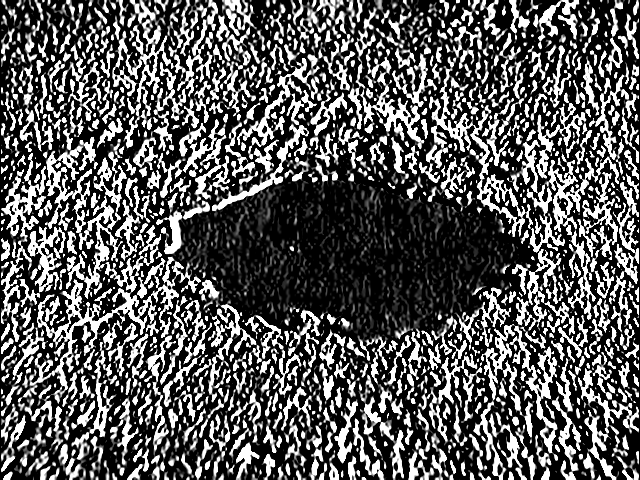

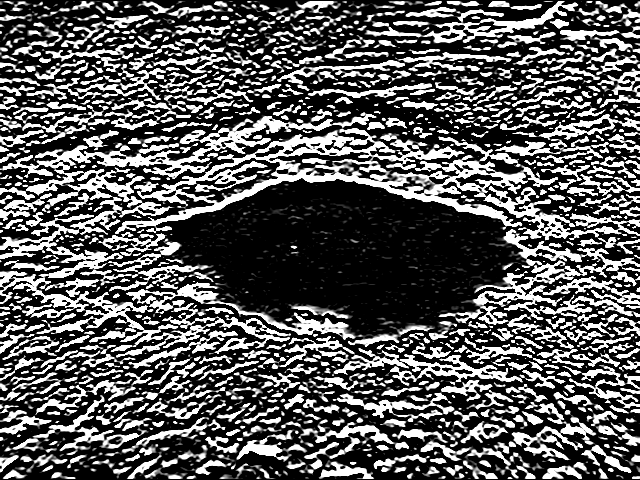

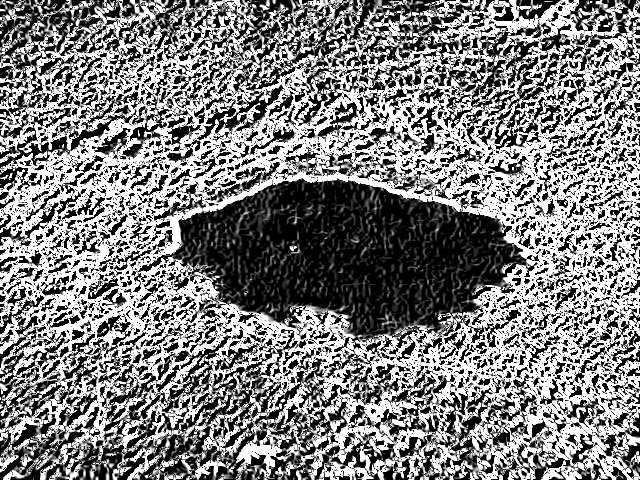

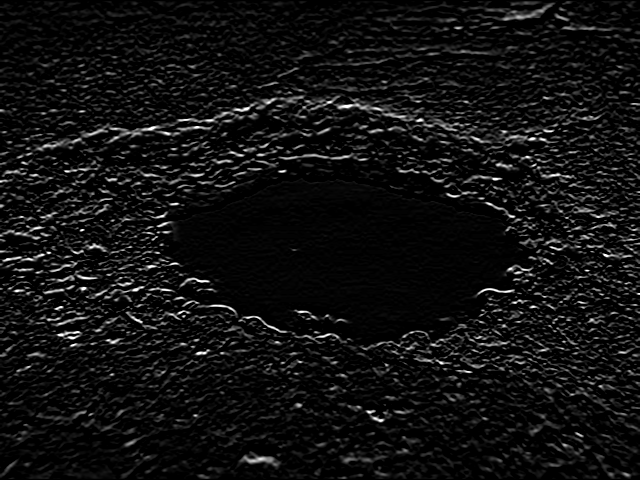

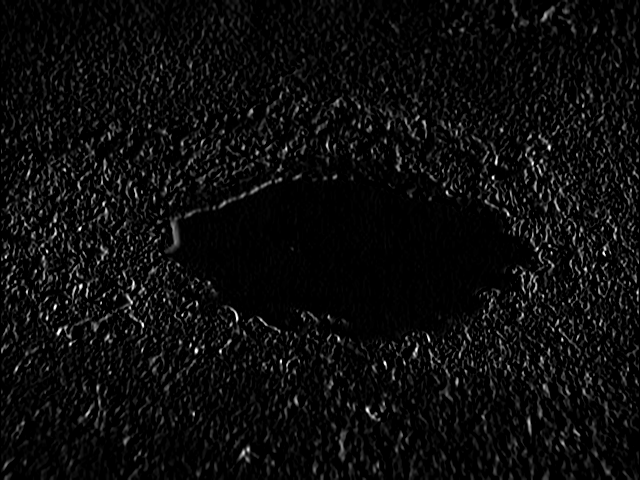

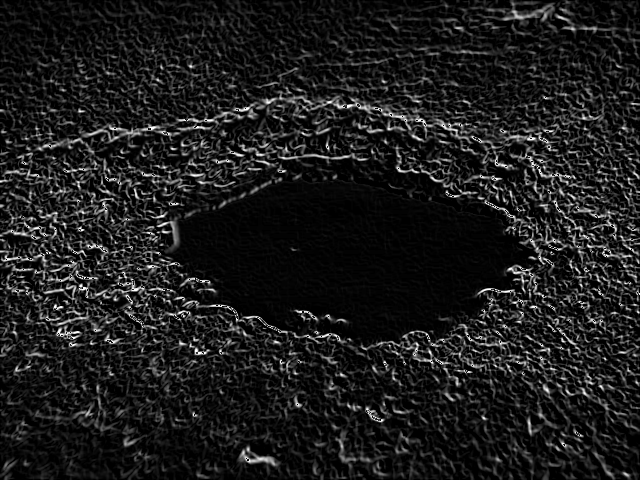

In [ ]:
img = cv2.imread('6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(img,(3,3),0)

#canny
img_canny = cv2.Canny(img,450,450)


#sobel
img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img_gaussian,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)


cv2_imshow( img)
cv2_imshow(img_canny)
cv2_imshow(img_sobelx)
cv2_imshow( img_sobely)
cv2_imshow( img_sobel)
cv2_imshow(img_prewittx)
cv2_imshow( img_prewitty)
cv2_imshow(img_prewittx + img_prewitty)


cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'LOG')

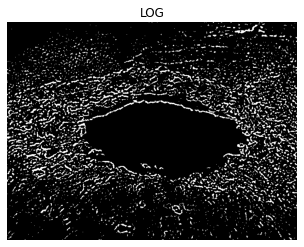

In [ ]:
blur = cv2.GaussianBlur(img, (7, 7), 0)

laplacian = cv2.Laplacian(blur, cv2.CV_64F)

# Apply a threshold to the Laplacian image to identify the edges
_, thresh = cv2.threshold(laplacian, 5, 255, cv2.THRESH_BINARY)

# Display the resulting edge-detected image
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title(f"LOG")

In [ ]:
from math import log10, sqrt

def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

print(f"PSNR value of Canny {PSNR(img,img_canny)} dB")
print(f"PSNR value of Robert {PSNR(img,edged_img)} dB")
print(f"PSNR value of Sobel {PSNR(img,img_sobel)} dB")
print(f"PSNR value of Prewitt {PSNR(img,img_prewittx + img_prewitty)} dB")
print(f"PSNR value of LOG {PSNR(img,thresh)} dB")

PSNR value of Canny 27.948266456935965 dB
PSNR value of Robert 8.104666865310868 dB
PSNR value of Sobel 27.932033985507925 dB
PSNR value of Prewitt 27.933747939776218 dB
PSNR value of LOG 5.870824488109506 dB


In [ ]:
print(f"SSIM value of Canny {calculate_ssim(img,img_canny)} ")
print(f"SSIM value of Robert {calculate_ssim(img,edged_img)} ")
print(f"SSIM value of Sobel {calculate_ssim(img,img_sobel)} ")
print(f"SSIM value of Prewitt {calculate_ssim(img,img_prewittx + img_prewitty)} ")
print(f"SSIM value of LOG {calculate_ssim(img,thresh)} ")

SSIM value of Canny 0.008169128598735509 
SSIM value of Robert 0.09210866494510213 
SSIM value of Sobel 0.009239462133417673 
SSIM value of Prewitt 0.05194224613411584 
SSIM value of LOG -0.07534017587461399 


Segmentation

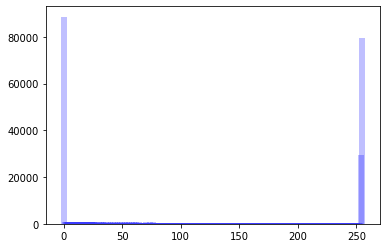

optimal threshold 131


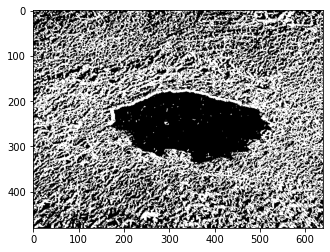

In [ ]:
threshold_values = {}
h = [1]


def Hist(img):
   row, col = img.shape 
   y = np.zeros(256)
   for i in range(0,row):
      for j in range(0,col):
         y[img[i,j]] += 1
   x = np.arange(0,256)
   plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
   plt.show()
   return y


def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y


   
def countPixel(h):
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
           cnt += h[i]
    return cnt


def wieght(s, e):
    w = 0
    for i in range(s, e):
        w += h[i]
    return w


def mean(s, e):
    m = 0
    w = wieght(s, e)
    for i in range(s, e):
        m += h[i] * i
    
    return m/float(w)


def variance(s, e):
    v = 0
    m = mean(s, e)
    w = wieght(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v
            

def threshold(h):
    cnt = countPixel(h)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = wieght(0, i) / float(cnt)
        mb = mean(0, i)
        
        vf = variance(i, len(h))
        wf = wieght(i, len(h)) / float(cnt)
        mf = mean(i, len(h))
        
        V2w = wb * (vb) + wf * (vf)
        V2b = wb * wf * (mb - mf)**2
        
        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('Wb='+ str(wb) + "\n")
        fw.write('Mb='+ str(mb) + "\n")
        fw.write('Vb='+ str(vb) + "\n")
        
        fw.write('Wf='+ str(wf) + "\n")
        fw.write('Mf='+ str(mf) + "\n")
        fw.write('Vf='+ str(vf) + "\n")

        fw.write('within class variance='+ str(V2w) + "\n")
        fw.write('between class variance=' + str(V2b) + "\n")
        fw.write("\n")
        
        if not math.isnan(V2w):
            threshold_values[i] = V2w


def get_optimal_threshold():
    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
    print( 'optimal threshold', optimal_threshold[0])
    return optimal_threshold[0]


img = np.asarray(img_sobel)

h = Hist(img)
threshold(h)
op_thres = get_optimal_threshold()

res = regenerate_img(img, op_thres)
plt.imshow(res,cmap='gray')

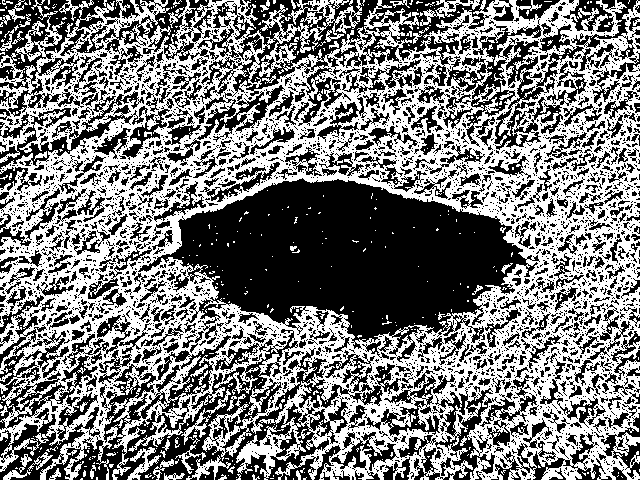

In [ ]:
# Otsu thresholding type on an image
img = img_sobel

# applying Otsu thresholding
# as an extra flag in binary
# thresholding	
ret, thresh1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY +
											cv2.THRESH_OTSU)	

# the window showing output image		
# with the corresponding thresholding		
# techniques applied to the input image	
cv2_imshow(thresh1)		
	
# De-allocate any associated memory usage		
if cv2.waitKey(0) & 0xff == 27:
	cv2.destroyAllWindows()	


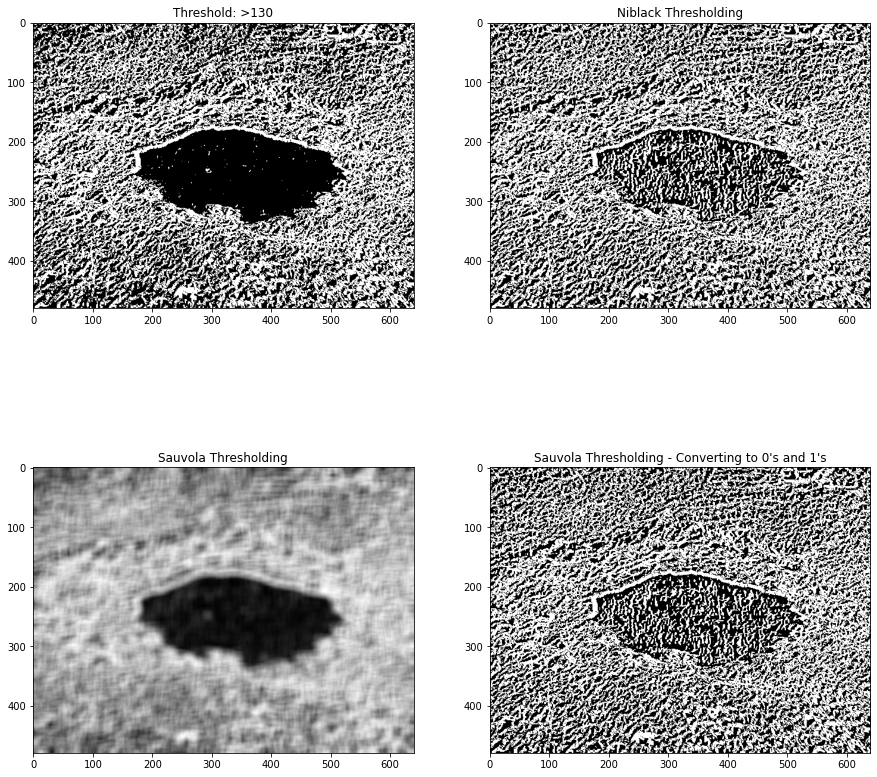

In [ ]:
# Importing necessary libraries
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Setting plot size to 15, 15
plt.figure(figsize=(15, 15))
img = img_sobel
# Sample Image of scikit-image package

# Computing Otsu's thresholding value
threshold = filters.threshold_otsu(img)

# Computing binarized values using the obtained
# threshold
thrsgt = (img > threshold)*1
plt.subplot(2,2,1)
plt.title("Threshold: >"+str(threshold))

# Displaying the binarized image
plt.imshow(thrsgt, cmap = "gray")

# Computing Ni black's local pixel
# threshold values for every pixel
threshold = filters.threshold_niblack(img)

# Computing binarized values using the obtained
# threshold
thrsnibl = (img > threshold)*1
plt.subplot(2,2,2)
plt.title("Niblack Thresholding")

# Displaying the binarized image
plt.imshow(thrsnibl, cmap = "gray")

# Computing Sauvola's local pixel threshold
# values for every pixel - Not Binarized
thshsau = filters.threshold_sauvola(img)
plt.subplot(2,2,3)
plt.title("Sauvola Thresholding")

# Displaying the local threshold values
plt.imshow(thshsau, cmap = "gray")

# Computing Sauvola's local pixel
# threshold values for every pixel - Binarized
trsh01 = (img > thshsau)*1
plt.subplot(2,2,4)
plt.title("Sauvola Thresholding - Converting to 0's and 1's")

# Displaying the binarized image
plt.imshow(trsh01, cmap = "gray")


Text(0.5, 1.0, 'Chan-Vese segmentation')

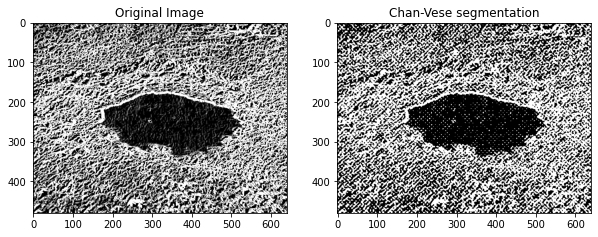

In [ ]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Sample Image of scikit-image package
img = img_sobel

# Computing the Chan VESE segmentation technique
img2 = chan_vese(img,
									max_iter=10,
									extended_output=True)

ax = axes.flatten()

# Plotting the original image
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")

# Plotting the segmented - 100 iterations image
ax[1].imshow(img2[0], cmap="gray")
title = "Chan-Vese segmentation"

ax[1].set_title(title)


In [ ]:
print(f"SSIM value of Optimal threshold {calculate_ssim(img,res)} dB")
print(f"SSIM value of Otsu threshold {calculate_ssim(img,thresh1)} dB")
print(f"SSIM value of Niblack threshold {calculate_ssim(img,thrsnibl)} dB")
print(f"SSIM value of souvola threshold {calculate_ssim(img,thshsau)} dB")
print(f"SSIM value of Chan-vese segmentation {calculate_ssim(img,img2[0])} dB")

SSIM value of Optimal threshold 0.8133433600234268 dB
SSIM value of Otsu threshold 0.8133433600234268 dB
SSIM value of Niblack threshold 0.008771639692297077 dB
SSIM value of souvola threshold 0.024167568000391434 dB
SSIM value of Chan-vese segmentation 0.007537010455321924 dB
